# Import Libraries

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and Preprocess Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (60000, 28, 28, 1) (60000,)
Test set: (10000, 28, 28, 1) (10000,)


# Exploratory Data Analysis (EDA)

Distribution of digits

/tmp/ipython-input-960072608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


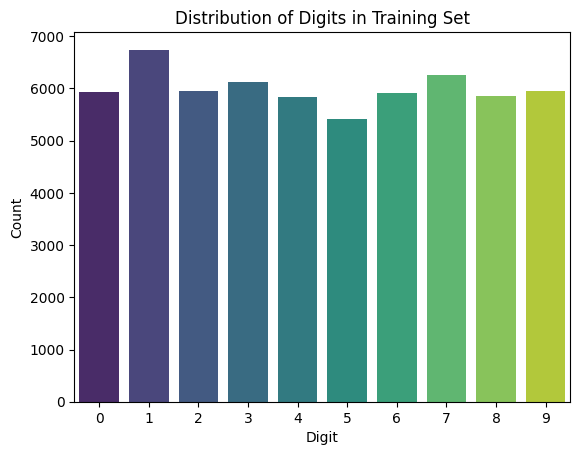

In [3]:
sns.countplot(x=y_train, palette="viridis")
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


Sample Images

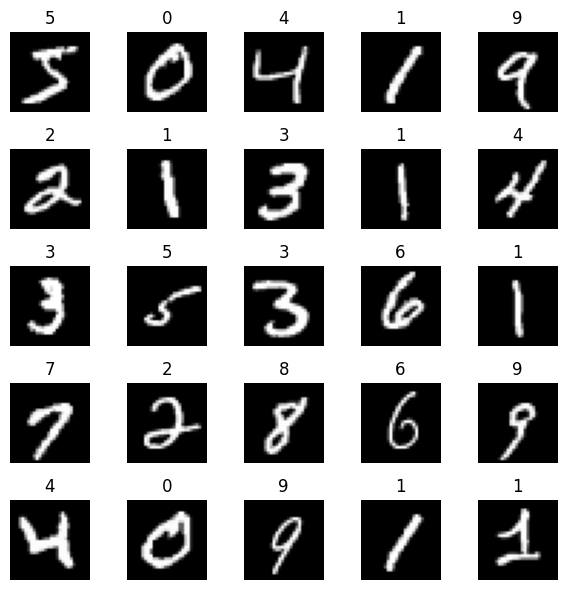

In [4]:
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


# Build CNN Model

In [5]:
model = models.Sequential([
    # Feature Extraction layers
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Classification layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0–9)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile Model

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Train Model

In [9]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint("best_mnist_model.h5", save_best_only=True)
]


In [10]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks
)


Epoch 1/20
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8246 - loss: 0.5474

844/844 ━━━━━━━━━━━━━━━━━━━━ 56s 61ms/step - accuracy: 0.8248 - loss: 0.5467 - val_accuracy: 0.9855 - val_loss: 0.0544
Epoch 2/20
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9702 - loss: 0.1013

844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9702 - loss: 0.1013 - val_accuracy: 0.9890 - val_loss: 0.0394
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9776 - loss: 0.0728

844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9776 - loss: 0.0728 - val_accuracy: 0.9913 - val_loss: 0.0348
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.9828 - loss: 0.0560 - val_accuracy: 0.9903 - val_loss: 0.0371
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9845 - loss: 0.0515 - val_accuracy: 0.9910 - val_loss: 0.0358
Epoch 6/20
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9856 - loss: 0.0458

844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9856 - loss: 0.0458 - val_accuracy: 0.9913 - val_loss: 0.0321
Epoch 7/20
843/844 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9863 - loss: 0.0440

844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 60ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9920 - val_loss: 0.0292
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9872 - loss: 0.0410 - val_accuracy: 0.9925 - val_loss: 0.0295
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9893 - loss: 0.0340

844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.9893 - loss: 0.0340 - val_accuracy: 0.9922 - val_loss: 0.0287
Epoch 10/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9911 - loss: 0.0288

844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9911 - loss: 0.0288 - val_accuracy: 0.9930 - val_loss: 0.0265
Epoch 11/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 59ms/step - accuracy: 0.9915 - loss: 0.0267 - val_accuracy: 0.9930 - val_loss: 0.0273
Epoch 12/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.9910 - loss: 0.0260 - val_accuracy: 0.9935 - val_loss: 0.0282
Epoch 13/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.9938 - val_loss: 0.0280


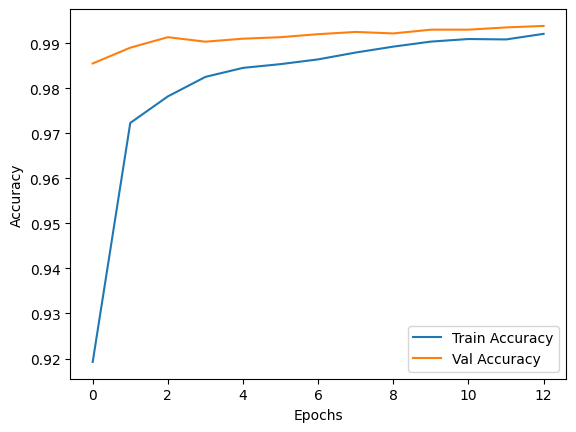

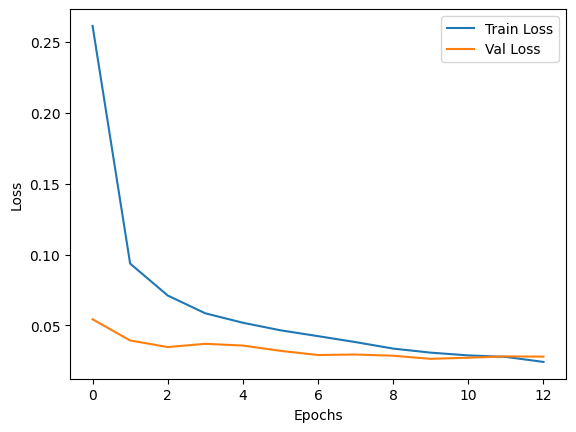

In [11]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Evaluate Model

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9908 - loss: 0.0284

Test Accuracy: 0.9925


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


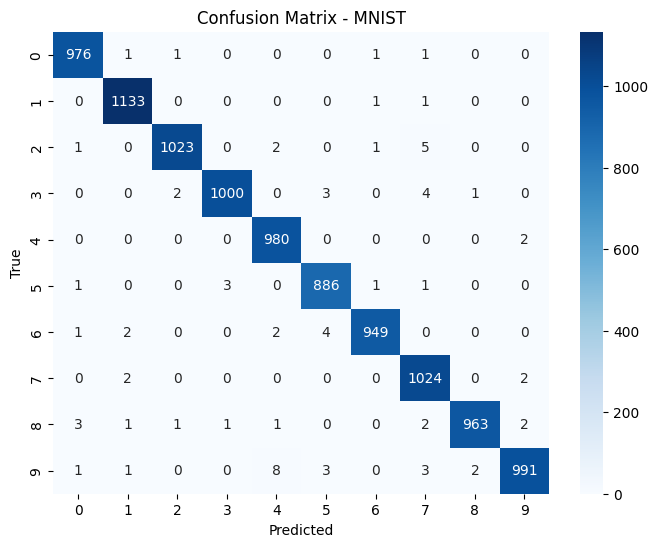

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [13]:
y_pred = model.predict(x_test).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - MNIST")
plt.show()

print(classification_report(y_test, y_pred))


# Plot Training Curves

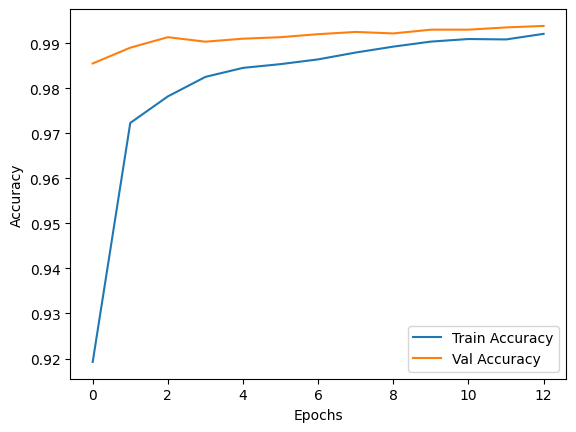

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Predictions Example

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


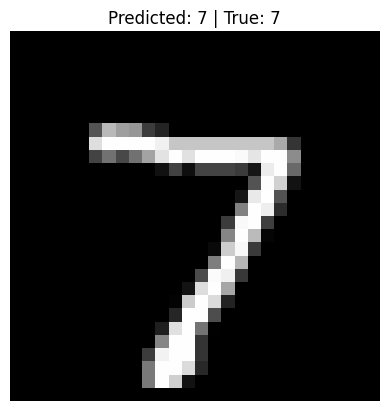

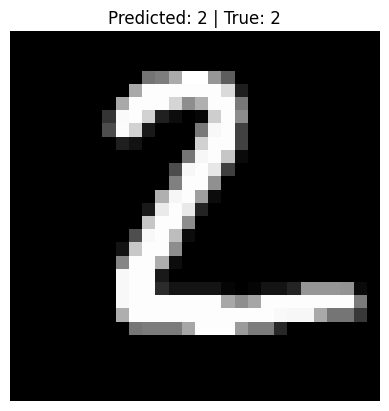

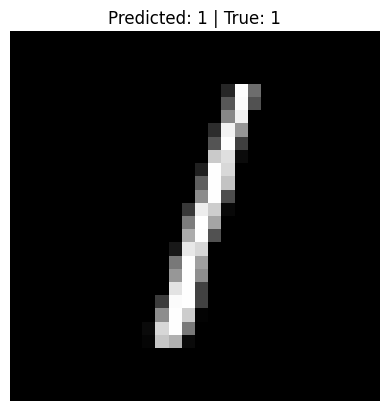

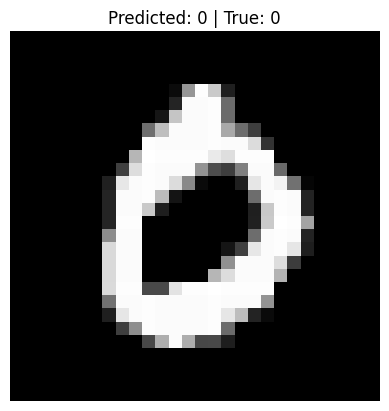

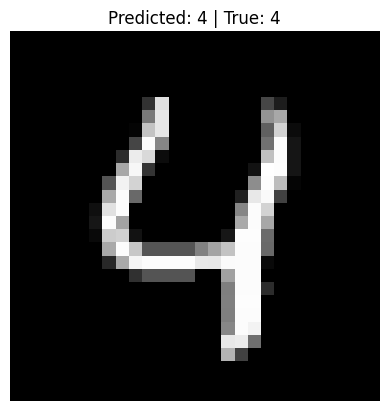

In [15]:
predictions = model.predict(x_test[:5])

for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Predicted: {predictions[i].argmax()} | True: {y_test[i]}")
    plt.axis("off")
    plt.show()

# Save Model

In [16]:
model.save("mnist_cnn_final.h5")


# Summary

This project implements a Convolutional Neural Network (CNN) for handwritten digit recognition using the MNIST dataset. It includes data preprocessing, exploratory data analysis (EDA), model building, training with callbacks, evaluation, and visualization. The final model achieved 99% test accuracy and was saved for future deployment in real-world applications.